/home/u21/kianmilani/src/pyfalco/falco/config


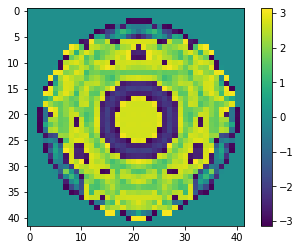

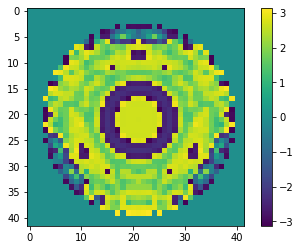

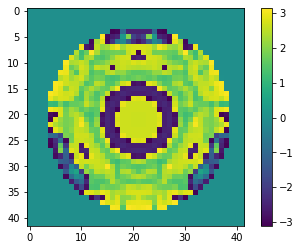

In [1]:
import numpy as np
import pickle
from astropy.io import fits
import astropy.units as u
from pathlib import Path
from IPython.display import clear_output
import falco
import proper
import roman_phasec_proper as phasec
import copy

import misc

falco_dir = Path('/groups/douglase/kians-data-files/falco-phasec-data/hlc-band1-dms')
pkl_dir = Path('/home/u21/kianmilani/src/pyfalco/data/brief/')

from roman.EXAMPLE_config_Roman_CGI_HLC_NFOV_Band1 import mp

In [6]:
pwd

'/home/u21/kianmilani/Documents/falco-roman-cgi-dark-holes'

In [2]:
pkl_fname = 'hlc_band1_trial01_snippet.pkl'
with open(str(pkl_dir/pkl_fname), 'rb') as f: data = pickle.load(f)
data

namespace(dm1=namespace(Vpv=array([13.69591699, 16.95781408, 18.38167714, 23.21238291, 27.36543339]),
                        Spv=array([1.33882475e-08, 1.72776091e-08, 1.96626073e-08, 2.41832405e-08,
                                   2.79656315e-08]),
                        Srms=array([1.19605664e-09, 1.47906546e-09, 1.74068980e-09, 1.92690890e-09,
                                    2.09394876e-09]),
                        Vall=array([[[0., 0., 0., 0., 0., 0.],
                                     [0., 0., 0., 0., 0., 0.],
                                     [0., 0., 0., 0., 0., 0.],
                                     ...,
                                     [0., 0., 0., 0., 0., 0.],
                                     [0., 0., 0., 0., 0., 0.],
                                     [0., 0., 0., 0., 0., 0.]],
                             
                                    [[0., 0., 0., 0., 0., 0.],
                                     [0., 0., 0., 0., 0., 0.],
               

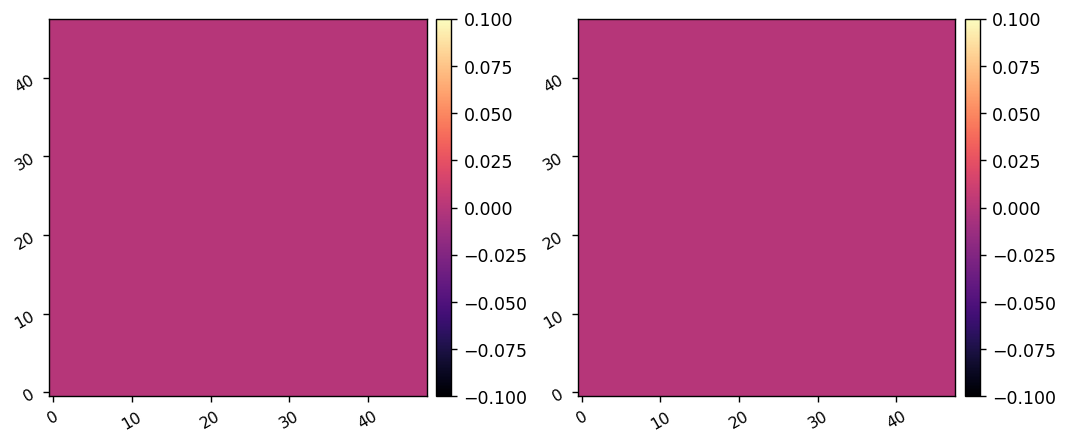

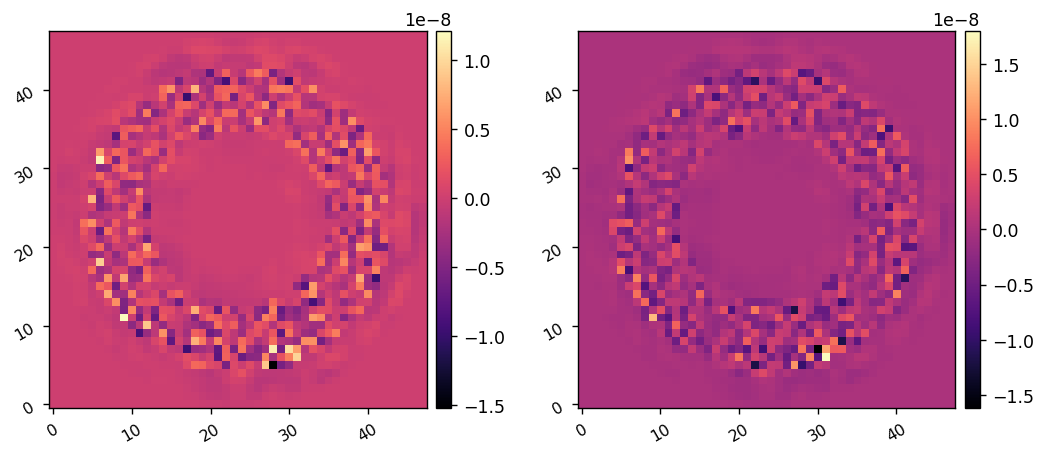

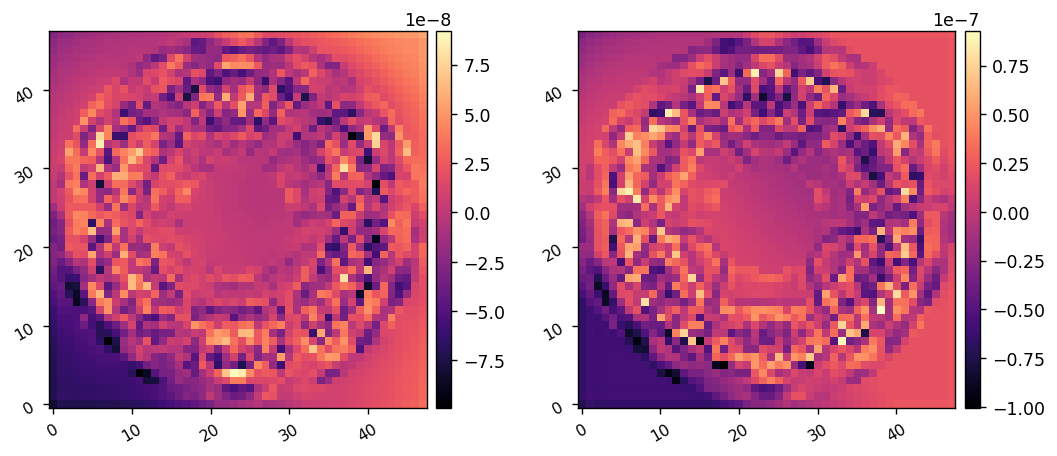

In [3]:
dm1_ref = data.dm1.Vall[:,:,0]*mp.dm1.VtoH
dm2_ref = data.dm2.Vall[:,:,0]*mp.dm2.VtoH
falco_dm1 = data.dm1.Vall[:,:,5]*mp.dm1.VtoH
falco_dm2 = data.dm2.Vall[:,:,5]*mp.dm2.VtoH

misc.myimshow2(dm1_ref, dm2_ref)
misc.myimshow2(falco_dm1, falco_dm2)
misc.myimshow2(falco_dm1+mp.full.dm1.flatmap, falco_dm2+mp.full.dm2.flatmap)

In [59]:
output_dim

58

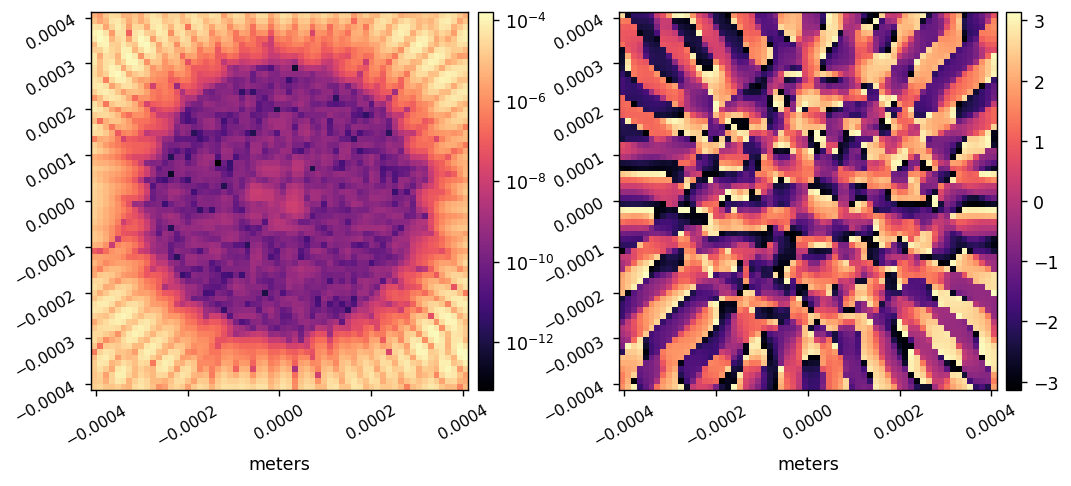

In [5]:
lambda_m=mp.lambda0
cor_type=mp.full.cor_type
final_sampling_lam0=mp.full.final_sampling_lam0
# output_dim=mp.full.output_dim
output_dim=64
source_x_offset=0
# use_fpm=1
use_errors=mp.full.use_errors
polaxis=mp.full.polaxis
use_field_stop=1
# use_pupil_defocus=1

# dm1_m, dm2_m = ( np.zeros((48,48)), np.zeros((48,48)) )
dm1_m, dm2_m = (falco_dm1+mp.full.dm1.flatmap, falco_dm2+mp.full.dm2.flatmap)

lam_array = np.array([lambda_m*1e6])
(proper_psfs, psfs_sampling_m) = proper.prop_run_multi('roman_phasec', lam_array, output_dim, QUIET=False, 
                                                PASSVALUE={'cor_type':cor_type,
                                                           'final_sampling_lam0':final_sampling_lam0, 
                                                           'source_x_offset':source_x_offset,
#                                                            'use_fpm':use_fpm,
#                                                            'use_hlc_dm_patterns':use_hlc_dm_patterns,
                                                           'use_errors': use_errors,
                                                           'use_lens_errors':use_errors,
#                                                            'use_pupil_defocus':use_pupil_defocus,
                                                           'use_dm1':1, 'dm1_m':dm1_m, 
                                                           'use_dm2':1, 'dm2_m':dm2_m,
                                                           'use_field_stop':use_field_stop,
                                                           'polaxis':polaxis,
                                                          })
clear_output()

proper_psf = proper_psfs[0]
psf_pixelscale = psfs_sampling_m[0]*u.m/u.pix

misc.myimshow2(np.abs(proper_psf)**2, np.angle(proper_psf), lognorm1=True,
               pxscl1=psf_pixelscale, pxscl2=psf_pixelscale,)

In [23]:
falco.INFLUENCE_XINETICS

'/home/u21/kianmilani/src/pyfalco/falco/data/influence_dm5v2.fits'